<a href="https://colab.research.google.com/github/Jum-eng/DCIT-311-MACHINE-LEARNING-PROJECT/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING PROJECT-BREAST CANCER DETECTION**

# **B- Benign**
# **M-Malignant**

# **Import Libraries:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# **Data Loading:**

In [3]:
df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Shape of Dataset:**

In [4]:
df.shape

(569, 32)

# **Column Datatype and Information:**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Data Cleaning:**

In [6]:
df.drop(columns=['id'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print(df.dropna(inplace=True))
df

None


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Statistics of Numerical Features

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# **Checking Null Values in the dataset**

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# **Checking Duplicated Records**

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

# **Visualization of data:**

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
print(df['diagnosis'].unique())




['M' 'B']


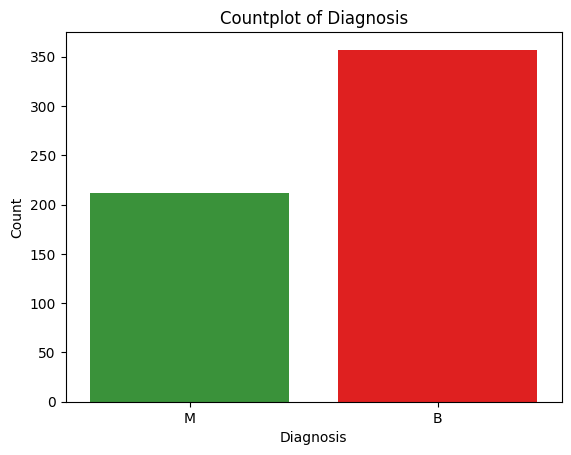

In [13]:
custom_palette = [ "#2ca02c", "#FF0000", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Create countplot with custom colors
sns.countplot(data=df, x='diagnosis', palette=custom_palette)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Countplot of Diagnosis")
plt.show()


# **Box Plotting for all Numerical Values**

In [14]:
num_feature_list = [ f for f in df.columns if df.dtypes[f] == 'float64']
num_feature_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

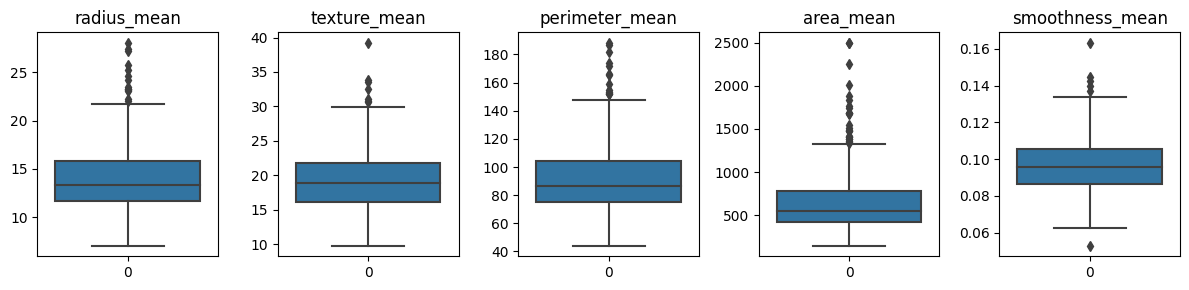

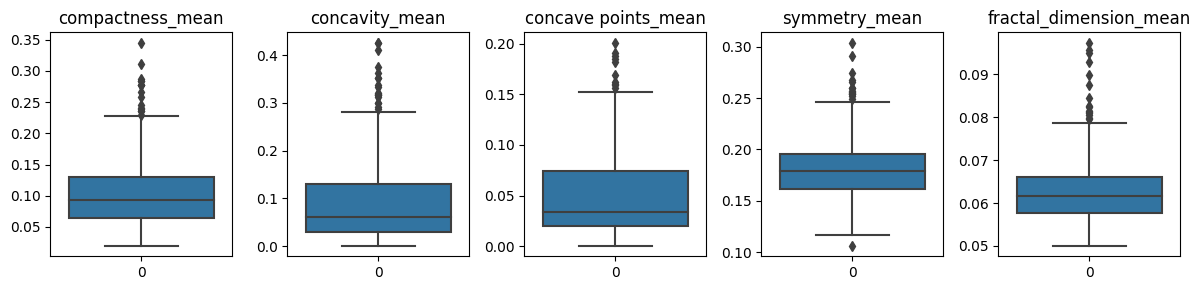

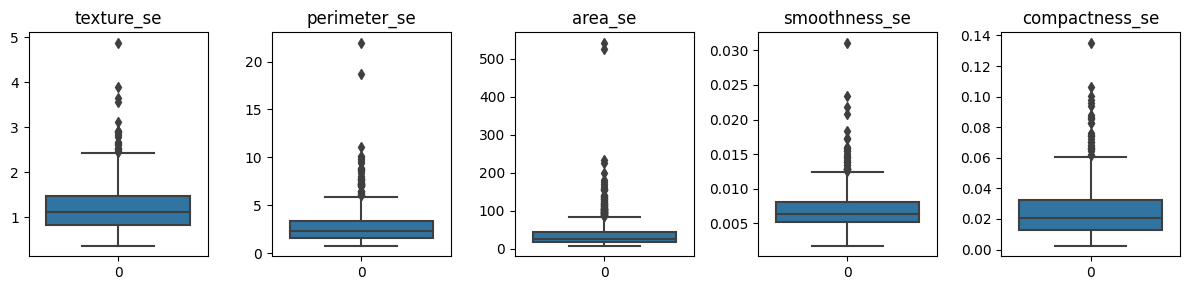

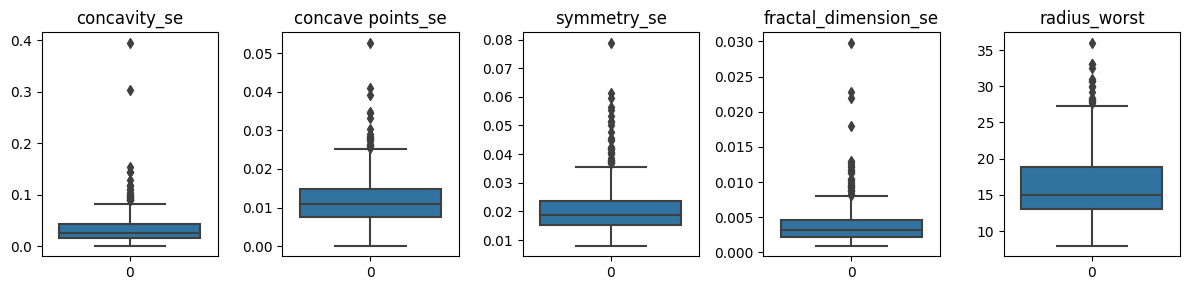

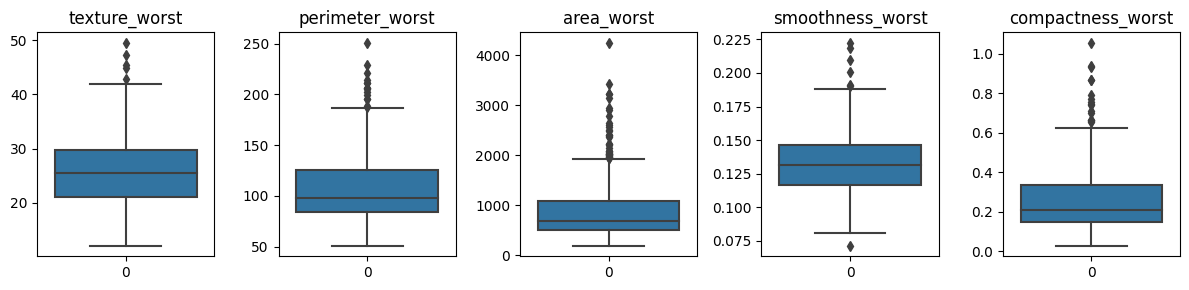

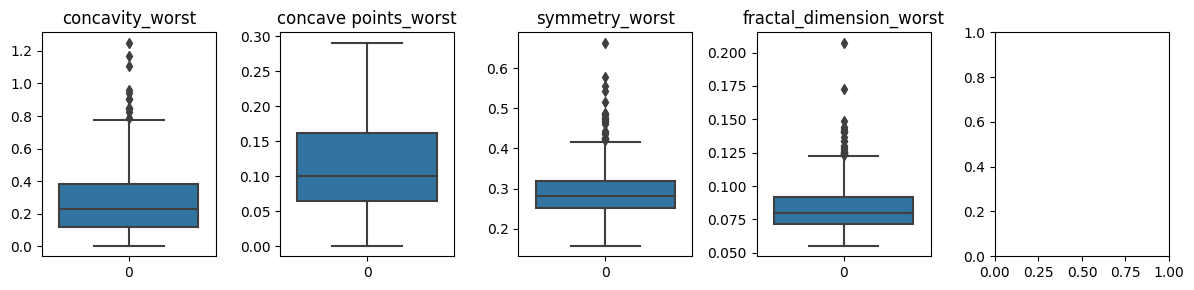

In [15]:
fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[:5], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[5:11], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[11:16], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[16:21], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[21:26], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[26:30], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

# **Detection and Capping of Outlier:**

In [16]:
p_05 = df['compactness_se'].quantile(0.05)
p_05

0.0078922

In [17]:
p_95 = df['compactness_se'].quantile(0.95)
p_95

0.06057800000000001

In [18]:
p_05 = df['compactness_se'].quantile(0.05) #5th quantile
p_95 = df['compactness_se'].quantile(0.95) #95th quantile

df['compactness_se'].clip(p_05, p_95, inplace=True)


<Axes: >

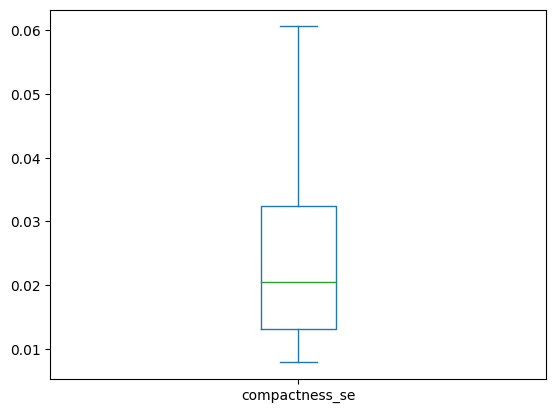

In [19]:
df['compactness_se'].plot(kind = 'box')

In [20]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[num_col] = df[num_col].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))


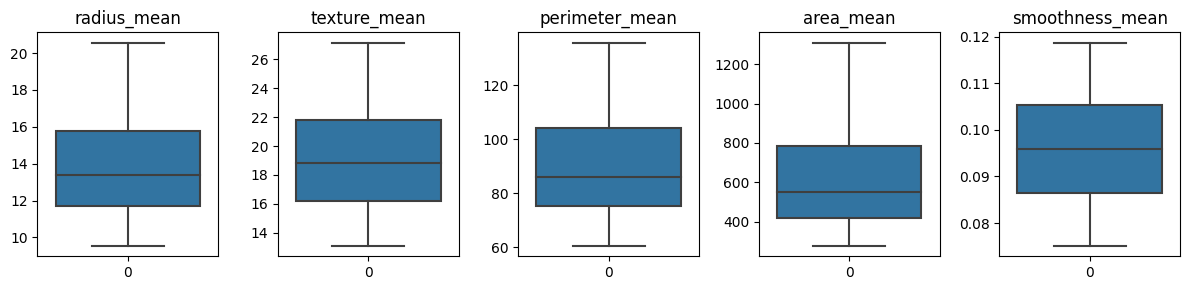

In [21]:
fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[:5], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

# **Checking for variance**

In [22]:
# Grouping by 'diagnosis' and calculating the mean of numeric columns
Df = df.groupby('diagnosis').mean().T
print(Df)



diagnosis                         B            M
radius_mean               12.207504    17.166245
texture_mean              17.906880    21.426538
perimeter_mean            78.443681   113.106321
area_mean                466.170924   935.665094
smoothness_mean            0.092532     0.102110
compactness_mean           0.080418     0.140223
concavity_mean             0.045528     0.153109
concave points_mean        0.025995     0.084424
symmetry_mean              0.174316     0.191114
fractal_dimension_mean     0.062565     0.062602
radius_se                  0.285809     0.571912
texture_se                 1.192957     1.192651
perimeter_se               2.009978     4.039610
area_se                   21.284986    64.435613
smoothness_se              0.007045     0.006654
compactness_se             0.020890     0.030928
concavity_se               0.023781     0.040458
concave points_se          0.009809     0.014634
symmetry_se                0.020399     0.019459
fractal_dimension_se

In [23]:
Df['%Diff'] = round(abs(Df['B']- Df['M']) / ((Df['B'] + Df['M'])/2) *100 , 2)
Df.head()

diagnosis,B,M,%Diff
radius_mean,12.207504,17.166245,33.76
texture_mean,17.906880,21.426538,17.90
perimeter_mean,78.443681,113.106321,36.19
area_mean,466.170924,935.665094,66.98
smoothness_mean,0.092532,0.102110,9.84


In [24]:
Df.sort_values(by = '%Diff' , ascending = False)
Df.head()

diagnosis,B,M,%Diff
radius_mean,12.207504,17.166245,33.76
texture_mean,17.906880,21.426538,17.90
perimeter_mean,78.443681,113.106321,36.19
area_mean,466.170924,935.665094,66.98
smoothness_mean,0.092532,0.102110,9.84


# **Cheching Correlation**

# **Correlation among independent values**

# **Independent Values**

In [25]:
independent_var = df.drop(['diagnosis'], axis = 1)
independent_var.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.088,122.80,1001.0,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,...,25.38,17.33,171.64,2009.6,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890
1,20.57,17.770,132.90,1309.8,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69,21.250,130.00,1203.0,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758
3,11.42,20.380,77.58,386.1,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,...,14.91,26.50,98.87,567.7,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
4,20.29,14.340,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


# **Correlation**

In [26]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.350097,0.997964,0.994257,0.172086,0.507693,0.678482,0.808524,0.149761,-0.304946,...,0.974078,0.315988,0.968877,0.959451,0.144436,0.460516,0.572206,0.745270,0.201963,0.042035
texture_mean,0.350097,1.000000,0.357333,0.356116,0.009937,0.261811,0.342739,0.322095,0.101514,-0.055638,...,0.371069,0.908453,0.381532,0.369712,0.094329,0.289575,0.331189,0.319199,0.122509,0.122507
perimeter_mean,0.997964,0.357333,1.000000,0.992128,0.206166,0.553824,0.714477,0.836219,0.180658,-0.258566,...,0.975533,0.323901,0.975054,0.960643,0.174199,0.502363,0.607630,0.773453,0.225426,0.086780
area_mean,0.994257,0.356116,0.992128,1.000000,0.176203,0.506211,0.686530,0.812949,0.158075,-0.288064,...,0.974732,0.317470,0.969040,0.971586,0.151854,0.449443,0.568897,0.738696,0.195308,0.043673
smoothness_mean,0.172086,0.009937,0.206166,0.176203,1.000000,0.659564,0.530444,0.563261,0.548158,0.585084,...,0.232808,0.057477,0.255038,0.233636,0.802662,0.479967,0.448187,0.511857,0.406939,0.505476
compactness_mean,0.507693,0.261811,0.553824,0.506211,0.659564,1.000000,0.893477,0.835693,0.586610,0.551310,...,0.552655,0.253512,0.600483,0.544162,0.563054,0.885100,0.838728,0.822846,0.494582,0.711443
concavity_mean,0.678482,0.342739,0.714477,0.686530,0.530444,0.893477,1.000000,0.930912,0.489085,0.321597,...,0.711410,0.328374,0.746625,0.710002,0.472957,0.803804,0.909931,0.887361,0.424258,0.556981
concave points_mean,0.808524,0.322095,0.836219,0.812949,0.563261,0.835693,0.930912,1.000000,0.460820,0.172513,...,0.833774,0.309512,0.855791,0.827609,0.472905,0.712209,0.795999,0.921705,0.396997,0.411332
symmetry_mean,0.149761,0.101514,0.180658,0.158075,0.548158,0.586610,0.489085,0.460820,1.000000,0.473874,...,0.199159,0.115363,0.228724,0.200934,0.426030,0.478423,0.443023,0.428070,0.704240,0.456438
fractal_dimension_mean,-0.304946,-0.055638,-0.258566,-0.288064,0.585084,0.551310,0.321597,0.172513,0.473874,1.000000,...,-0.236244,-0.039196,-0.189683,-0.220468,0.499533,0.452134,0.324961,0.178187,0.324983,0.774986


<ipython-input-27-dde62d057280>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


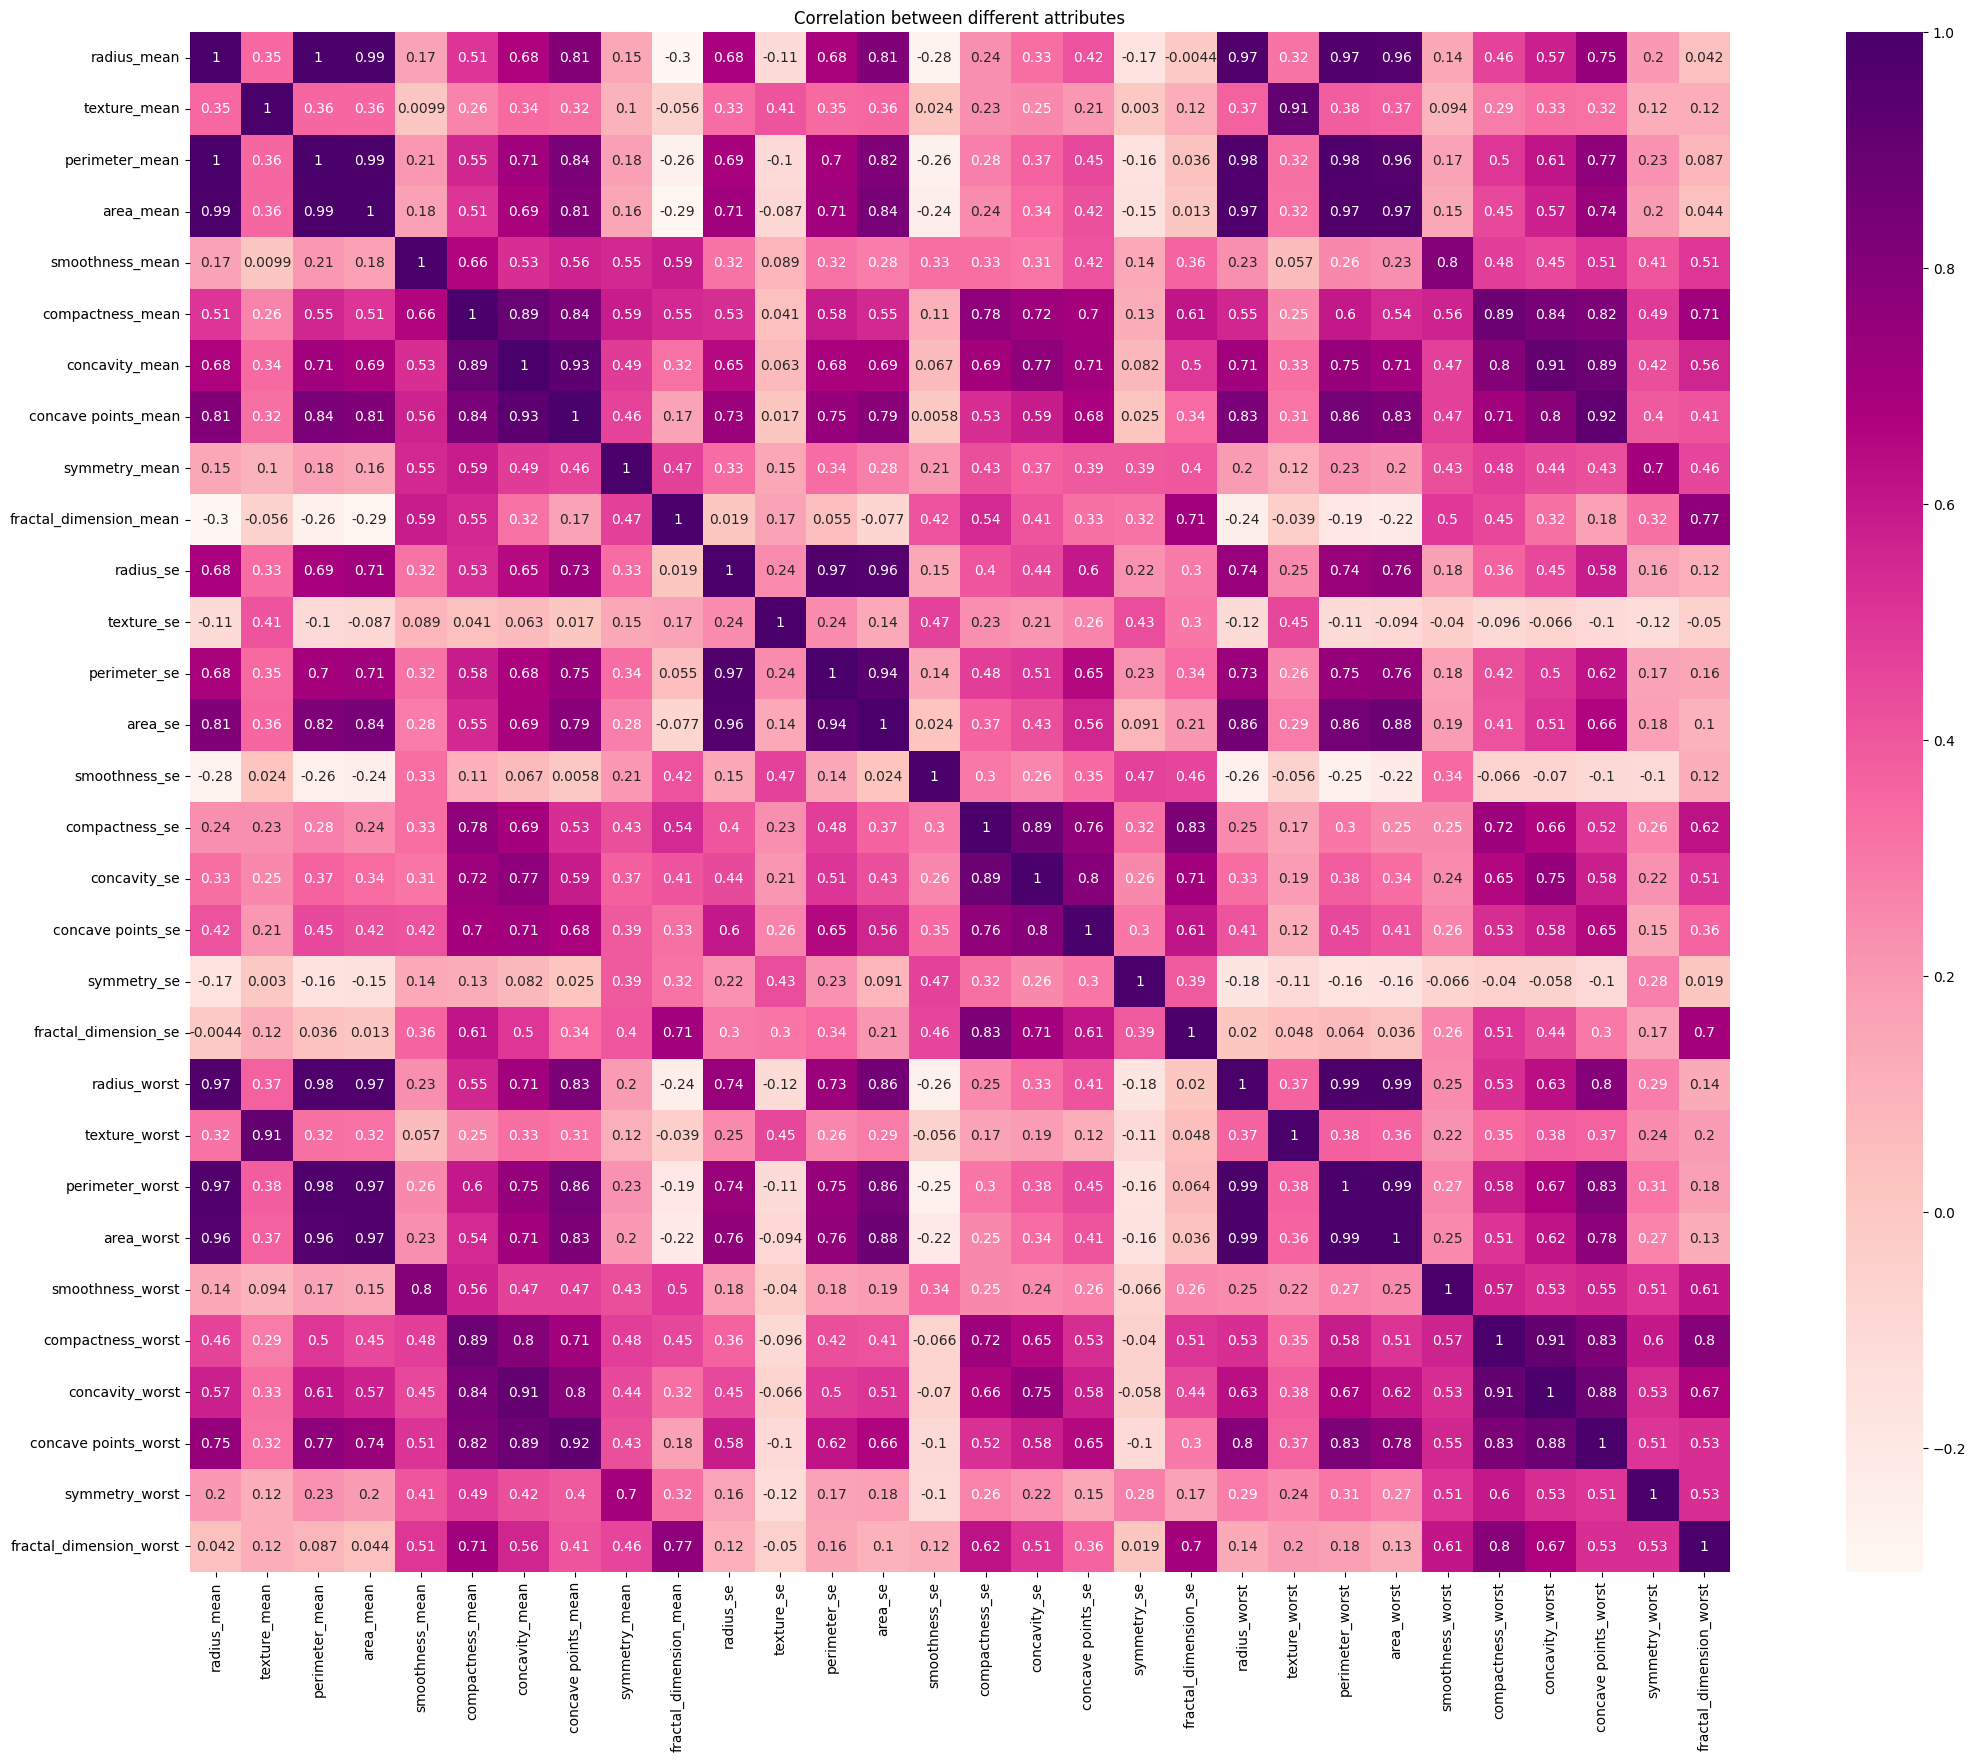

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
cor = df.corr()

# Set the colormap to 'RdPu' for pink shades
sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='RdPu')

plt.title('Correlation between different attributes')
plt.show()



# **Upper Triangular Matrix**

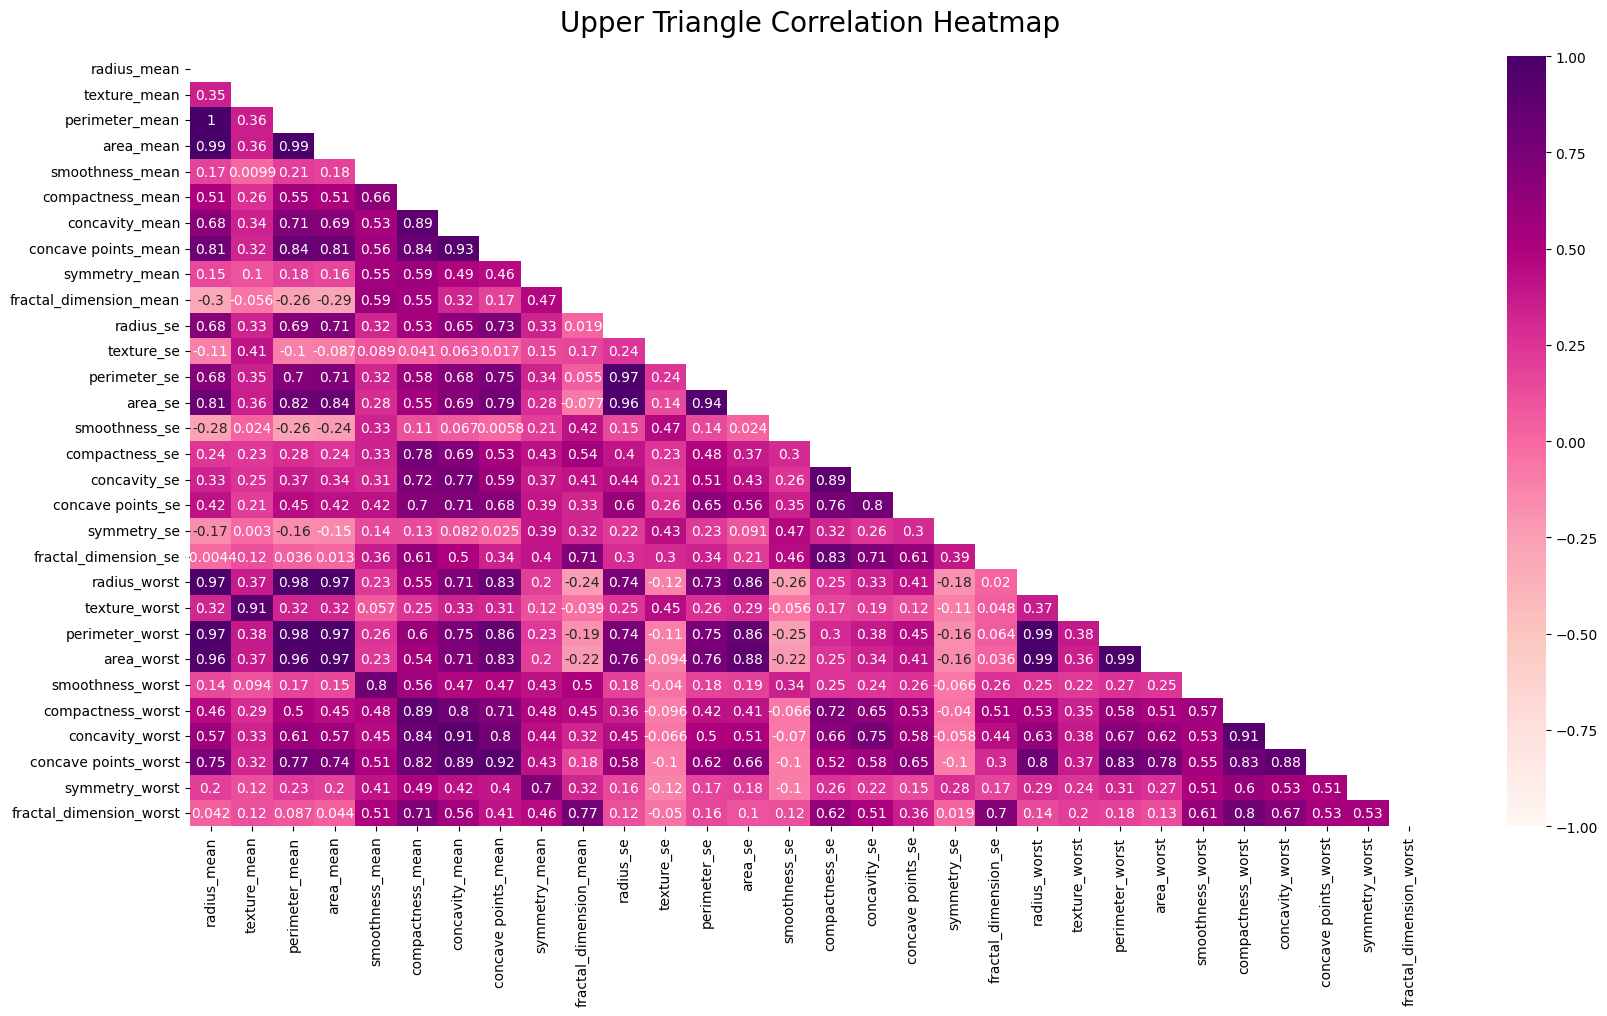

In [28]:
plt.figure(figsize=(20, 10))

# Assuming you have defined a mask for your data
# For upper triangular mask:
upper_triangle_mask = np.triu(np.ones_like(cor, dtype=np.bool_))

# Create the heatmap with the 'RdPu' colormap using the upper triangular mask
heatmap = sns.heatmap(cor, mask=upper_triangle_mask, vmin=-1, vmax=1, annot=True, cmap='RdPu')

# Set the title
heatmap.set_title('Upper Triangle Correlation Heatmap', fontdict={'fontsize': 20}, pad=18)

plt.show()




# **Creating the Correlation matrix and Selecting the Upper triangular matrix**

In [29]:
cor = cor.abs()
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))
upper_tri

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.350097,0.997964,0.994257,0.172086,0.507693,0.678482,0.808524,0.149761,0.304946,...,0.974078,0.315988,0.968877,0.959451,0.144436,0.460516,0.572206,0.745270,0.201963,0.042035
texture_mean,NaN,NaN,0.357333,0.356116,0.009937,0.261811,0.342739,0.322095,0.101514,0.055638,...,0.371069,0.908453,0.381532,0.369712,0.094329,0.289575,0.331189,0.319199,0.122509,0.122507
perimeter_mean,NaN,NaN,NaN,0.992128,0.206166,0.553824,0.714477,0.836219,0.180658,0.258566,...,0.975533,0.323901,0.975054,0.960643,0.174199,0.502363,0.607630,0.773453,0.225426,0.086780
area_mean,NaN,NaN,NaN,NaN,0.176203,0.506211,0.686530,0.812949,0.158075,0.288064,...,0.974732,0.317470,0.969040,0.971586,0.151854,0.449443,0.568897,0.738696,0.195308,0.043673
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659564,0.530444,0.563261,0.548158,0.585084,...,0.232808,0.057477,0.255038,0.233636,0.802662,0.479967,0.448187,0.511857,0.406939,0.505476
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.893477,0.835693,0.586610,0.551310,...,0.552655,0.253512,0.600483,0.544162,0.563054,0.885100,0.838728,0.822846,0.494582,0.711443
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930912,0.489085,0.321597,...,0.711410,0.328374,0.746625,0.710002,0.472957,0.803804,0.909931,0.887361,0.424258,0.556981
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460820,0.172513,...,0.833774,0.309512,0.855791,0.827609,0.472905,0.712209,0.795999,0.921705,0.396997,0.411332
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473874,...,0.199159,0.115363,0.228724,0.200934,0.426030,0.478423,0.443023,0.428070,0.704240,0.456438
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.236244,0.039196,0.189683,0.220468,0.499533,0.452134,0.324961,0.178187,0.324983,0.774986


# **Dropping features with highly correlated **

In [30]:
features_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(features_to_drop)



['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


# **New DataFrame**

In [31]:
independent_var1 = independent_var.drop(features_to_drop, axis = 1)
independent_var1.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.088,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,0.95952,0.9053,...,0.01587,0.030030,0.006193,17.33,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890
1,20.57,17.770,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.7339,...,0.01340,0.013890,0.003532,23.41,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69,21.250,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,0.74560,0.7869,...,0.02058,0.022500,0.004571,25.53,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758
3,11.42,20.380,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,0.49560,1.1560,...,0.01867,0.034988,0.007960,26.50,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
4,20.29,14.340,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.7813,...,0.01885,0.017560,0.005115,16.67,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


# **Discarding Columns with low variance**

In [32]:
from sklearn.feature_selection import VarianceThreshold

# Define the threshold value
threshold_n = 0.99

# Instantiate VarianceThreshold
sel = VarianceThreshold(threshold=(threshold_n * (1 - threshold_n)))

# Fit and transform the independent variables using VarianceThreshold
sel_var = sel.fit_transform(independent_var)

# Get the selected features using get_support(indices=True)
selected_features = independent_var.columns[sel.get_support(indices=True)]

# Subset the original independent_var DataFrame with selected features
independent_var_subset = independent_var[selected_features]


# **Converting Target Variables into Numerical**
.diagnosis : M = 1
.diagnosis: B = 0
.

In [33]:
Target_var = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Target_var.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# **Variables X and y**

In [34]:
X = independent_var1
y = Target_var

# **Feature Scaling**

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [36]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[ 1.23905995, -1.57426143,  1.7944261 , ...,  1.97363218,
         2.34002465,  2.311078  ],
       [ 2.05146513, -0.37191295, -0.91422395, ...,  1.15414711,
        -0.26172399,  0.3698075 ],
       [ 1.77436569,  0.52175914,  1.0862823 , ...,  1.97363218,
         1.45016155,  0.2762523 ],
       ...,
       [ 0.80136879,  2.03689285, -0.92951341, ...,  0.44281091,
        -1.31702307, -0.33315591],
       [ 2.05335444,  2.03689285,  1.74614357, ...,  1.97363218,
         2.34002465,  2.35135871],
       [-1.42512521,  1.36663878, -1.69463061, ..., -1.44840998,
        -0.02170296, -0.84056296]])

# **Splitting Data into train and test set**

In [37]:
from sklearn.model_selection import train_test_split

# Assuming X_scaled is your feature matrix and y is your target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


# **Model Building**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline


# **Evaluation Matrix**

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [40]:
scoring = 'accuracy'

# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.934300 (Std accuracy is 0.037659)
For SVM Model:Mean accuracy is 0.978213 (Std accuracy is 0.023814)
For NB Model:Mean accuracy is 0.916667 (Std accuracy is 0.046522)
For KNN Model:Mean accuracy is 0.947246 (Std accuracy is 0.029681)


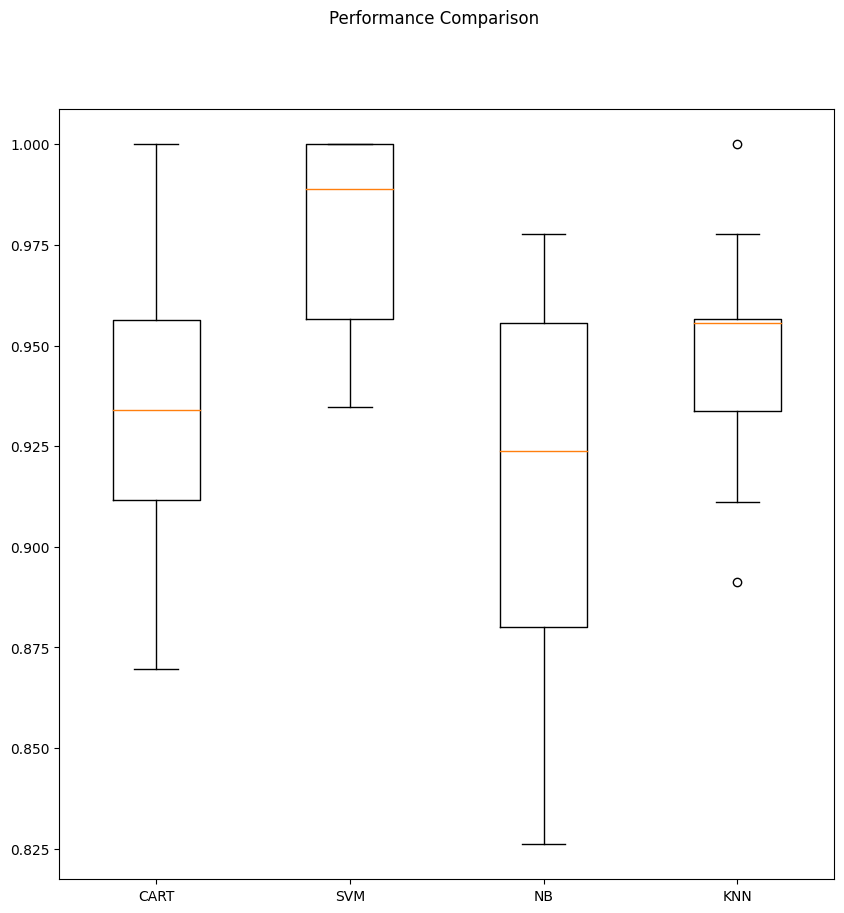

In [41]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **1.Logistic regression Model**

In [42]:
print("........Logistic regression..........")
from sklearn.linear_model import LogisticRegression
Lr_model = LogisticRegression()
Lr_model.fit(X_train, y_train)
y_pred_Lr = Lr_model.predict(X_test)
print(classification_report(y_test, y_pred_Lr))


........Logistic regression..........
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Decision Tree Model**

In [43]:
print("........Decision Tree..........")
from sklearn.tree import DecisionTreeClassifier
Dt_model = DecisionTreeClassifier()
Dt_model.fit(X_train, y_train)
y_pred_Dt = Dt_model.predict(X_test)
print(classification_report(y_test, y_pred_Dt))

........Decision Tree..........
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        67
           1       0.84      0.98      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



# **Random Forest Model**

In [44]:
print("........Random Forest Model..........")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

........Random Forest Model..........
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Support Vector Machine**

In [45]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9736842105263158


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>